We’ll use the built-in R data set named "PlantGrowth".

It contains the weight of plants obtained under a control and two  different treatment conditions.

## Objective:
We want to see if the average weights of the plants in the 3 experimental circumstances vary significantly.

In [15]:
install.packages(c("dplyr", "ggplot2", "datasets", "ggpubr"))
library(dplyr)
library(ggplot2)
library(datasets)
library(ggpubr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [9]:
data = PlantGrowth

# **EDA**

To have an idea of what the data look like, we use the the function sample_n()[in dplyr package].

- The sample_n() function randomly picks a few of the observations in the data frame to print out

In [4]:
summary(data)

     weight       group   
 Min.   :3.590   ctrl:10  
 1st Qu.:4.550   trt1:10  
 Median :5.155   trt2:10  
 Mean   :5.073            
 3rd Qu.:5.530            
 Max.   :6.310            

In [8]:
# showing a random sample
set.seed(123)
dplyr::sample_n(data, 10)

weight,group
<dbl>,<fct>
5.87,trt1
4.32,trt1
3.59,trt1
5.18,ctrl
5.14,ctrl
4.89,trt1
5.12,trt2
4.81,trt1
4.50,ctrl


In [10]:
str(data)

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...


In [13]:
# Checking the levels
levels(data$group)

[1] "ctrl" "trt1" "trt2"

In [12]:
# If the levels are not in the correct order automatically,
# we can reorder them as follows:

data$group = ordered(data$group, levels = c("ctrl", "trt1", "trt2"))

### The dplyr package can be used to compute summary statistics by groups

In [14]:
group_by(data, group) %>%
summarise(
  count = n(),
  mean = mean(weight, na.rm = TRUE),
  sd = sd(weight, na.rm = TRUE)
)

group,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
ctrl,10,5.032,0.5830914
trt1,10,4.661,0.7936757
trt2,10,5.526,0.4425733


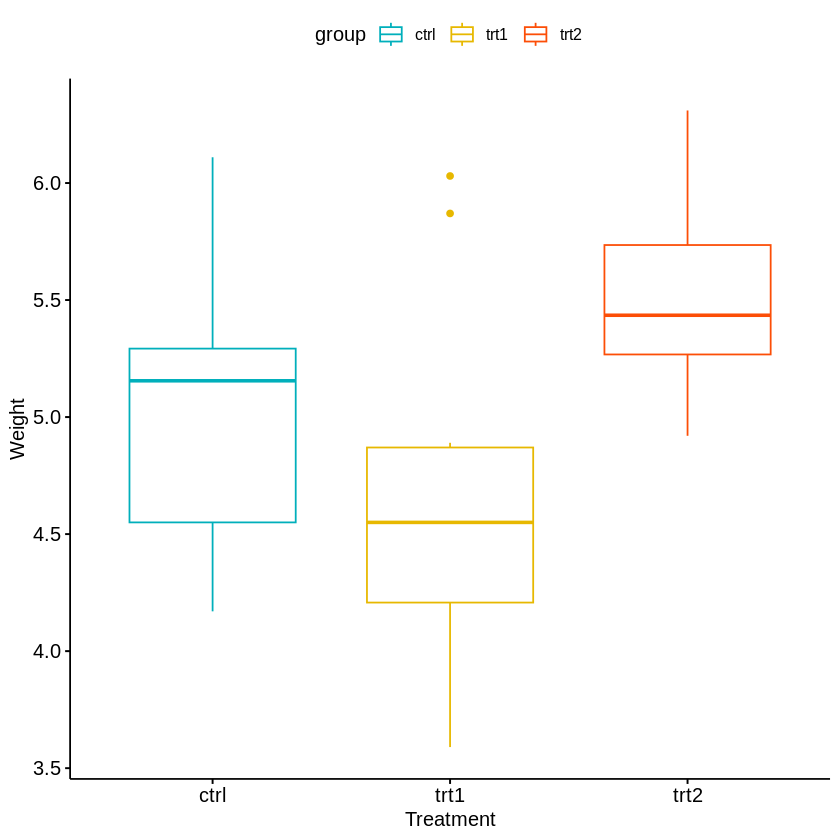

In [16]:
#Visualizing our data using ggpubr R package
ggboxplot(data, x = "group", y = "weight",
          color = "group", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
          order = c("ctrl", "trt1", "trt2"),
          ylab = "Weight", xlab = "Treatment")

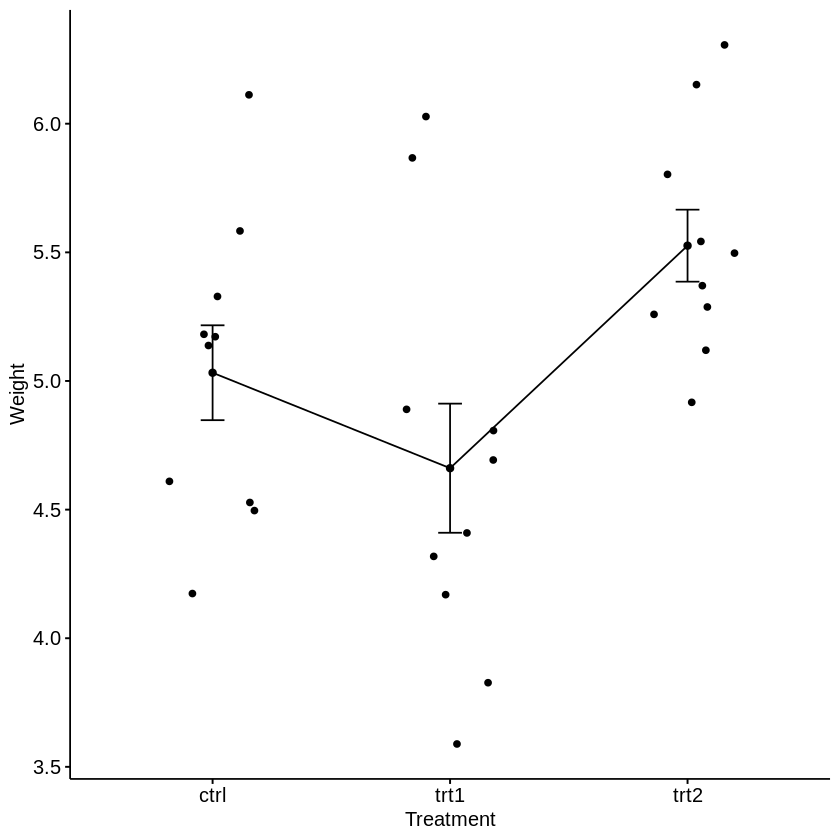

In [17]:
#Adding an error bars: mean_se
library("ggpubr")
ggline(data, x = "group", y = "weight",
       add = c("mean_se", "jitter"),
       order = c("ctrl", "trt1", "trt2"),
       ylab = "Weight", xlab = "Treatment")

We want to see if the average weights of the plants in the 3 experimental circumstances vary significantly.

## **Setting up Null Hypothesis and Alternate Hypothesis**

`H0 = mu0 = mu01 = mu02 `

(There is no difference between the average weights of the plants in the three experimental groups)

`H1 = Not all means are equal.`

# **Performing an analysis of variance (ANOVA)**

In [18]:
res.aov = aov(weight ~ group, data = data)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Here, in the above model summary because the `p-value` is less than the significance level of `0.05`
- We can conclude that **there are significant differences between the groups**

------

# **Multiple pairwise-comparison between the means of groups**

In one-way ANOVA test, a significant p-value indicates that some of the group means are different, but we don’t know which pairs of groups are different.

Therefore, it’s possible to perform multiple pairwise-comparison, to determine if the mean difference between specific pairs of group are statistically significant.

# **Tukey multiple pairwise-comparisons**
### The function TukeyHSD() takes the fitted ANOVA as an argument:


In [19]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ group, data = data)

$group
            diff        lwr       upr     p adj
trt1-ctrl -0.371 -1.0622161 0.3202161 0.3908711
trt2-ctrl  0.494 -0.1972161 1.1852161 0.1979960
trt2-trt1  0.865  0.1737839 1.5562161 0.0120064


Here, we get:
- `diff`: difference between means of the two groups
- `lwr, upr`: the lower and the upper end point of the confidence interval at 95% (default)
- `p adj`: p-value after adjustment for the multiple comparisons.

We can see that only the difference between `trt2` and `trt1` is significant,
as shown by the output, with an adjusted p-value of 0.012.

--------

# **Checking ANOVA assumptions:** test validity?

The ANOVA test assumes that,
- the data are normally distributed
- the variance across groups are homogeneous.

We can check that with some diagnostic plots:

Checking ANOVA assumptions:
# 1. **Homogeneity of variances**

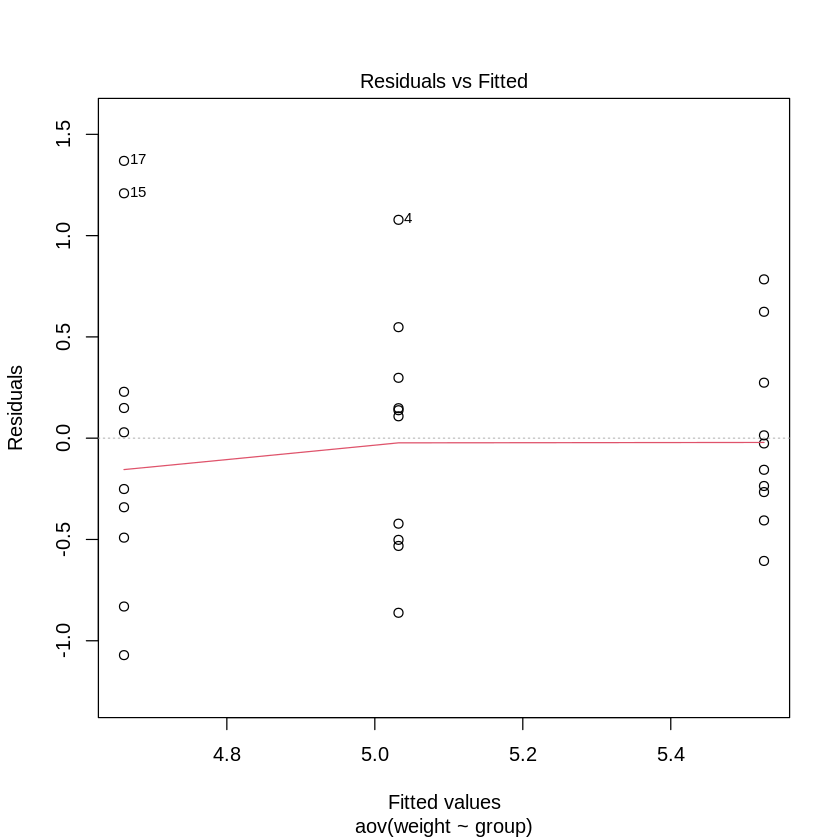

In [20]:
plot(res.aov, 1)

We can see that **there are no clear correlations between residuals and fitted values** (the mean of each group) in the plot below, which is good.

As a result, we can assume that the variances are homogeneous.

ANOVA (one-way) Outliers are discovered in R Points 17, 15, 4, which can have a significant impact on normality and homogeneity of variance

#Statistical Test

Levene’s test is recommended since it is less sensitive to deviations from normal distribution.

The leveneTest() (car package) will be used:

In [22]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
leveneTest(weight ~ group, data = data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.119186,0.3412266
,27,NA,NA


Here, the `p-value `indicates that there is no indication that the variance across groups is statistically significant. Therefore, we can infer that the variations in the different treatment groups are homogeneous.

(**Note:** But In a circumstance where the homogeneity of variance assumption is violated the `Welch one-way test` can be used.)

----------

#2: **Normality**

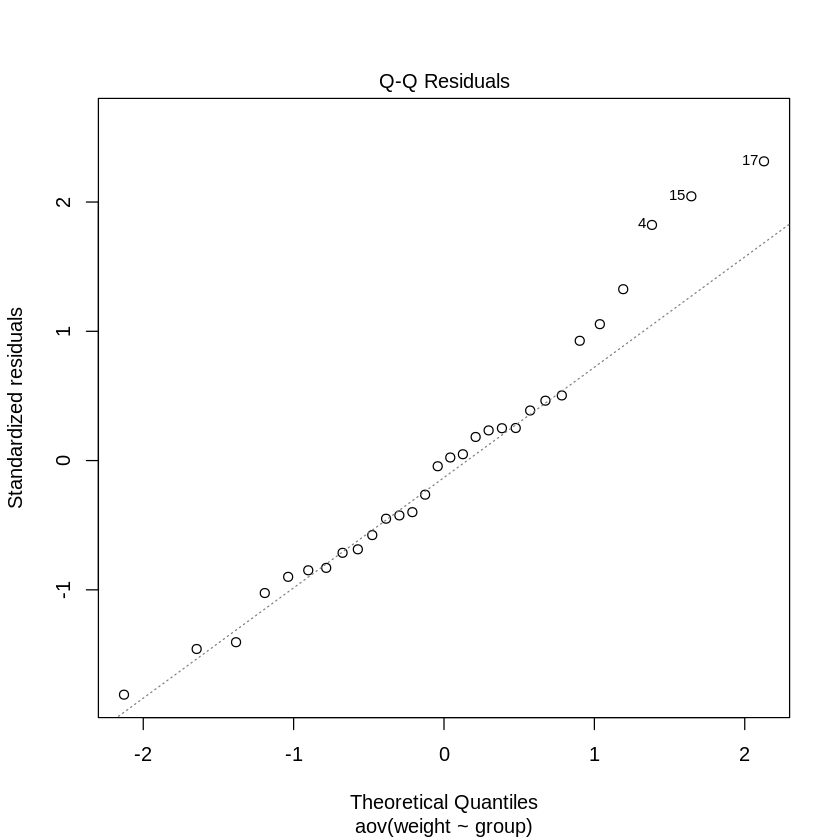

In [24]:
plot(res.aov, 2)

We can infer normality because all of the points lie roughly along this reference line.

### Shapiro-Wilk normality test

In [25]:
aov_residuals = residuals(object = res.aov)
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.96607, p-value = 0.4379


The Shapiro-Wilk test on the ANOVA residual finds no evidence of normality violation.

------

#### **The `Kruskal-Wallis` rank-sum test is a non-parametric alternative to one-way ANOVA that can be employed when the ANOVA assumptions are not met.**

In [27]:
kruskal.test(weight ~ group, data = data)


	Kruskal-Wallis rank sum test

data:  weight by group
Kruskal-Wallis chi-squared = 7.9882, df = 2, p-value = 0.01842


As seen above, the `p-value` is less than the significance level of `0.05`
- We can again conclude that **there are significant differences between the groups.**